In [1]:
import estimation as est
import numpy as np
from tabulate import tabulate
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

# PS 06 - Numerical Optimization
Most estimation procedures involve maximization of some function, e.g.,
likelihood functions or (weighted) squared moment conditions. The
purpose of this week's exercise is to introduce the *numerical
procedures which are used to maximize the objective function* for
various $M$-estimators: Maximum Likelihood (ML), Least Absolute
Deviations (LAD), etc.

Knowing and being able to apply these procedures can help you answer 
questions like: What can be done if the
algorithm does not converge? What can be done in order to speed up the
convergence? Did I find the maximum or something else? Is the model
identified? Hence, a minimum knowledge about numerical optimization is
critical for the applied researcher.


Exercise 1 --- Maximizing Univariate Functions
==============================================

Iterative maximization algorithms
---------------------------------

The maximization algorithms in this course are all *iterative* in the
sense that they start from some initial guess of the parameter,
$\boldsymbol{\theta}_0$, specified by the researcher. At each iteration, the
algorithm moves to a new value of the parameters $\boldsymbol{\theta }$ at which
the likelihood function, $\ell \left( \boldsymbol{\theta }\right)$, is higher
than at the previous value of $\boldsymbol{\theta }$. Note that the subscripts,
thus, are used in this context to express how many iterations the
algorithm has run over, i.e., we denote the current value of
$\boldsymbol{\theta }$ as $\boldsymbol{\theta }_{t}$, which is attained after $t$
iterations from the starting values $\boldsymbol{\theta }_{0}.$ The
question is then how to determine the best value of $\boldsymbol{\theta} _{t+1}$
given $\boldsymbol{\theta}_t$?


### Example: Newton-Raphson (N-R) {#example-newton-raphson-n-r .unnumbered}

To determine the best value of $\boldsymbol{\theta }_{t+1}$, take a second order
Taylor's approximation of $\ell \left( \boldsymbol{\theta}_{t+1}\right)$ around $\ell \left( \boldsymbol{\theta}_{t}\right) :$

$$\ell \left( \boldsymbol{\theta }_{t+1}\right) =\ell \left( \boldsymbol{\theta }_{t}\right) +\left( \boldsymbol{\theta }_{t+1}-\boldsymbol{\theta }_{t}\right)^{\prime }\mathbf{g}_{t}+\frac{1}{2}\left( \boldsymbol{\theta }_{t+1}-\boldsymbol{\theta }_{t}\right) ^{\prime }\mathbf{H}_{t}\left( \boldsymbol{\theta }_{t+1}-\boldsymbol{\theta }_{t}\right)$$ 

where $\mathbf{g}_{t}$ and
$\mathbf{H}_{t}$ are the gradient and Hessian of the log--likelihood
function evaluated at $\boldsymbol{\theta }_{t}$. The gradient equals the
average of the scores, i.e., $\mathbf{g}_{t} \equiv \frac{1}{%
N}\sum_{i=1}^{N}\mathbf{s}_{i}\left( \boldsymbol{\theta }_{t}\right)$ and $\mathbf{H}_{t} \equiv -\frac{1}{N}\sum_{i=1}^{N}\mathbf{H}_{i}\left( \boldsymbol{\theta 
}_{t}\right)$ (i.e., the subscript $t$ refers to the iteration).

Now find the value that maximizes this approximation to $\ell
\left( \boldsymbol{\theta }_{t+1}\right).$ The first order conditions are[^1]

$$
\nabla _{\theta _{t+1}}\ell \left( \boldsymbol{\theta }_{t+1}\right) =\mathbf{g}_{t}+\mathbf{H}_{t}\left( \boldsymbol{\theta }_{t+1}-\boldsymbol{\theta }_{t}\right)
\mathrel{\mathop :}= \mathbf{0}
$$ 

with solution 

$$
\begin{aligned}
\mathbf{H}_{t}\left( \boldsymbol{\theta }_{t+1}-\boldsymbol{\theta }_{t}\right) &=-\mathbf{g}_{t} \\
\left( \boldsymbol{\theta }_{t+1}-\boldsymbol{\theta }_{t}\right) &=-\mathbf{H}_{t}^{-1}\mathbf{g}_{t} \\
\boldsymbol{\theta }_{t+1} &=\boldsymbol{\theta }_{t}-\mathbf{H}_{t}^{-1}\mathbf{g}_{t} \quad \quad \quad (1)
\end{aligned} 
$$

This step formalizes the Newton-Raphson (N-R) Algorithm.


Maximizing a quadratic function
-------------------------------

This exercise asks you to code up the Newton-Raphson algorithm and to
apply it to maximize two univariate functions. Consider first the
quadratic function $$y\left( \theta \right) =a+b\theta +c\theta ^{2}$$

for $c>0$ (and note that $\theta$ is a scalar here). This function takes
its maximum at

$$
\frac{\mathrm{d}y}{\mathrm{d}\theta}=b+2c\theta =0
\qquad\Rightarrow\qquad
\theta _{\max }=-\frac{b}{2c}
$$

## Question 1: Calculate first step by hand

Consider the quadratic function $y\left( \theta\right)$ for
$a=1,b=2,c=3$. Calculate by hand the first step
$\theta_{t+1}-\theta_{t}$ of the N-R algorithm applied to
$y\left(\theta\right)$ starting in $\theta_{0} = 5$. Compare
$\theta_{t+1}$ to the analytical maximum $-\frac{b}{2c}$. What do
you find? Is this surprising? What happens if you change the
starting point?

*Hint:* To make it clear, from a starting point of 5, we find $\theta_{t + 1}$ by calculating eq. (1). Does it make sense that $g_t$ is the first derivative of $y$ (which is already given to you). And that $H_t$ is the second derivative of $y$?

## Question 2: Solve numerically using code.

Now maximize (numerically) the quadratic function
$y\left( \theta\right)$ for $a=1,b=2,c=3$ using the N-R algorithm
(in Python!). To do it, code up a loop which, starting in
$\theta_{t}$, works out the next step,
$\theta_{t+1}=\theta_{t}-\frac{y(\theta_{t})^\prime{}}{y(\theta_{t})^{\prime{}\prime{}}}$
and ends when some stopping criterion is met. How many iterations
are needed to maximize the quadratic function? Try different
starting values , $\theta _{0}$, and see if the required number of iterations changes.
Do you get a different result than in Question 1.a? (Hint: try to
compare the forward differenced gradients and Hessian to the
analytical one you just computed)

Programming hint:
As shown, we use the function `forward_diff(func, x0, h)` to estimate the gradient and hessian of a function, using forward derivation (the others being backward and centered).

Very often when we do minimizing/maximizing, we use `lambda` functions in python. They allow us to make functions "on the go". So if we make a lambda function for $y(\theta)$, and we want to approximately know its gradient at a specific point x, we could do the following,

```
y = theta: -(a + b*theta + c*theta*theta)
grad = estimation.forward_diff(y, x0, h)
```

You can compute the Hessian by applying
`forward_diff(func, x0, h)` twice. Note that since
`forward_diff(func, x0, h)` takes a function as input, you
need to define an anonymous function that computes the first
differensiation, which is done for you. The inner `forward_diff(fun, x0, h)` should
use a stepsize equal to the square root of machine precision,
$h=1.49e-08$, whereas the outer (first differenc'ing the first
difference) should use a much larger one $h=6e-6$ to avoid
approximation error.

Your loop should end when some convergence criterion is met. To end
a loop, we use a `break` statement.

In [2]:
# Initialize function parameters
a = 1.0
b = 2.0
c = 3.0

In [3]:
# Initialize machine steps
h = np.sqrt(np.finfo(float).eps)  # Square root of machine precision
l = 6e-6  # A larger step, or else the hessian might have some issues.

### Question 1

In [4]:
# Function
y = lambda theta: a + b*theta + c*theta*theta

# First derivate
dy = lambda theta: est.forward_diff(y, theta, h)

# Second derivate
ddy = lambda theta: est.forward_diff(dy, theta, l)

In [5]:
# Estimate solution
x0 = 5.0  # Start value
numeval = 10  # Number of iterations
tol0 = 1e-8  # Tolerance

In [6]:
## Fill in the missing code.
for i in range(numeval):
    grad0 =  # Gradient at point x0
    hess0 =  # Hessian at point x0
    x_new =  # Calculate eq. (1)
    grad_new =  # Gradient in new point
    if abs(grad_new)<=tol0:  # If gradient is almost 0, we reached min/max.
        break
    x0 = x_new  # Replace old point with new point.

SyntaxError: invalid syntax (<ipython-input-6-4b690057ea82>, line 3)

In [14]:
for i in range(numeval):
    grad0 = dy(x0)
    hess0 = ddy(x0)
    x_new = x0 - grad0/hess0
    grad_new = dy(x_new)
    if abs(grad_new) <= tol0:
        print(f'Tolerance reached on iteration {i}.')
        break
    x0 = x_new
print(f'Optimal theta reached at {x0:.3f}, with gradient {dy(x0):.2f} and hessian {ddy(x0):.2f}')

Tolerance reached on iteration 0.
Optimal theta reached at -0.333, with gradient -0.00 and hessian 5.99


# Question 3 Maximizing the sum of a quadratic and an exponential function

Consider now the function
$$
z\left( x\right) =2\theta^{2}+\theta^{3}-\exp \left( \theta\right)
$$

Question 3.a

Maximize $z\left( \theta\right)$ (numerically) for
$\theta\in \left[-5,5\right]$ using the N-R algorithm. Use the starting
values $\theta_{0} \in \left\{ -5,-3,-1,0,1,3,5\right\}$. Do you find
local minima and maxima? What is the unique global maximum of
$z\left( \theta\right)$? Does the Newton-Raphson method fail to converge
to the global maximum? Why?


In [15]:
# Estimate new functions
z = lambda theta:  # Fill in new equation
dz = lambda theta:  # Fill in to calculate gradient
ddz = lambda theta:  # Fill in to calculate gradient

SyntaxError: invalid syntax (<ipython-input-15-7ab9126576dc>, line 2)

In [16]:
# Estimate new functions
z = lambda theta: 2*theta*theta + theta*theta*theta - np.exp(theta)
dz = lambda theta: est.forward_diff(z, theta, h)
ddz = lambda theta: est.forward_diff(dz, theta, l)

In [23]:
# We want to start from different start values
startvals = [-5.0, -3.0, -1.0, 0.0, 1.0, 3.0, 5.0]
n_vals = len(startvals)  # This is to help us to know how many start values to loop over
numeval = 100  # Max number of iterations

# The following empty lists are to store the values achieved from the different starting points.
xopts = np.zeros(n_vals)  # Store optimal x we reached
numevals = np.zeros(n_vals)  # Store how many iterations it took
fvals = np.zeros(n_vals)  # Store the function value we reached
gradients = np.zeros(n_vals)  # Store the gradient value we reached
hess = np.zeros(n_vals)  # Store the hessian value we reached

In [24]:
## Fill in
# Make a similar loop like we did for y(theta).
# Now, you should have an outer loop, that loops over the different starting values.

In [25]:
for i in range(n_vals):
    x0 = startvals[i]
    for n in range(numeval):
        grad0 = dz(x0)
        hess0 = ddz(x0)
        x_new = x0 - grad0/hess0
        grad_new = dz(x0)
        hess_new = ddz(x0)
        if abs(grad_new) <= tol0:
           break
        x0 = x_new
    xopts[i] = x0
    fvals[i] = z(x0)
    gradients[i] = grad_new
    hess[i] = hess_new
    numevals[i] = n + 1  # Add one, since first iteration is 0.

In [28]:
# This prints out a nice table for you.
table = []
for i in range(n_vals):
    row = [startvals[i], xopts[i], fvals[i], gradients[i], hess[i], numevals[i]]
    table.append(row)
print(tabulate(
    table, 
    headers=['Start val', 'x', 'f(x)', 'gradient', 'hessian', 'iterations'],
    floatfmt='.3f'
    ))

  Start val       x    f(x)    gradient    hessian    iterations
-----------  ------  ------  ----------  ---------  ------------
     -5.000  -1.393   0.930      -0.000     -4.605         7.000
     -3.000  -1.393   0.930      -0.000     -4.607         7.000
     -1.000  -1.393   0.930      -0.000     -4.607         8.000
      0.000   0.273  -1.144       0.000      4.311         8.000
      1.000   0.273  -1.144       0.000      4.344         6.000
      3.000  -1.393   0.930      -0.000     -4.604         9.000
      5.000   4.276  42.799       0.000    -42.324       100.000


You should get something like this:

|   Start val |      x |   f(x) |   gradient |   hessian |   iterations |
|-------------|--------|--------|------------|-----------|--------------|
|      -5.000 | -1.393 |  0.930 |     -0.000 |    -4.605 |        7.000 |
|      -3.000 | -1.393 |  0.930 |     -0.000 |    -4.607 |        7.000 |
|      -1.000 | -1.393 |  0.930 |     -0.000 |    -4.607 |        8.000 |
|       0.000 |  0.273 | -1.144 |      0.000 |     4.311 |        8.000 |
|       1.000 |  0.273 | -1.144 |      0.000 |     4.344 |        6.000 |
|       3.000 | -1.393 |  0.930 |     -0.000 |    -4.604 |        9.000 |
|       5.000 |  4.276 | 42.799 |      0.000 |   -42.324 |      100.000 |

## Question 3.b

Make a plot of $z(\theta)$ around the analytical maximum. What is the
problem?

*Programming hints:*
Use the built-in function `np.linspace` to make a grid around
the maximum, evaluate $z(\theta)$ on this grid and plot it. Even if $\theta$ is a vector, you should not need to loop over the lambda function $z(\theta)$ that you made, just pass the linspace vector through it.

The function quickly takes some extremely large values. We have therefore made some code that "zooms" in on the are that we are interested in.

*Note:* when encountering convergence problems, plotting the
objective function may be helpful. Therefore, $\texttt{linspace}$ is
a useful function to know.

In [ ]:
# Calculate on a linespace of x
x_axis =  # Fill in using np.linspace
y_axis =  # Pass the x_axis through the z() function

# Plot the function
ax = plt.subplot(111)
ax.set_xlim(-10, 10)
ax.set_ylim(-20, 50)
ax.plot(x_axis, y_axis) ;

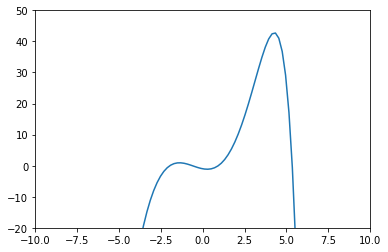

In [26]:
# Calculate on a linespace of x
x_axis = np.linspace(-10, 10, 100)
y_axis = z(x_axis)

# Plot the function
ax = plt.subplot(111)
ax.set_xlim(-10, 10)
ax.set_ylim(-20, 50)
ax.plot(x_axis, y_axis) ;